# 1. Import Required Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
%matplotlib inline

# 2. Load Data

In [2]:
ev_car_df = pd.read_csv("eleccarsfin.csv")

In [3]:
print("Total Number of Records=",ev_car_df.shape[0],"and Columns=",ev_car_df.shape[1])

Total Number of Records= 103 and Columns= 14


In [4]:
print("First 5 records of the dataframe:")
ev_car_df.head()

First 5 records of the dataframe:


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# 3. Info()

In [5]:
ev_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    object 
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    object 
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 11.4+ KB


# 4. Data Pre-Processing

In [6]:
ev_car_df.Brand.unique()

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

In [7]:
# Remove Leading and trailing spaces 
ev_car_df['Brand'] = ev_car_df['Brand'].str.strip()
ev_car_df['Model'] = ev_car_df['Model'].str.strip()

### TopSpeed_KmH

In [8]:
ev_car_df['TopSpeed_KmH'].unique()

array(['233', '160', '210', '180', '145', '250', '150', '225', '144',
       '167', '200', '165', '260', '130', '140', '217', '240', '261',
       '190', '135', '157', '155', '410', '241', 'two hundred', '123'],
      dtype=object)

In [9]:
#- we have a textual representation of the value - replace 'two hundred' with 200 
ev_car_df['TopSpeed_KmH'] = ev_car_df['TopSpeed_KmH'].replace('two hundred','200')

In [10]:
#- convert the entire column into int64 data type
ev_car_df['TopSpeed_KmH'] = ev_car_df['TopSpeed_KmH'].astype('int64') #- cast to in
ev_car_df['TopSpeed_KmH'].unique()

array([233, 160, 210, 180, 145, 250, 150, 225, 144, 167, 200, 165, 260,
       130, 140, 217, 240, 261, 190, 135, 157, 155, 410, 241, 123],
      dtype=int64)

### FastCharge_KmH

In [11]:
ev_car_df['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [12]:
# we see "-" value which is not meaningful - we either can replace with Average value or null
# Lets print how many such records we have 
ev_car_df[ev_car_df.FastCharge_KmH == "-"]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.6,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565


In [13]:
fast_charge_df = ev_car_df[ev_car_df.FastCharge_KmH != "-"][['FastCharge_KmH']]

In [14]:
fast_charge_df['FastCharge_KmH'] = fast_charge_df['FastCharge_KmH'].astype('int64')

In [15]:
fast_charge_df['FastCharge_KmH'].mean()


456.734693877551

In [16]:
# Lets replace "-" with mean value
ev_car_df['FastCharge_KmH'] =ev_car_df['FastCharge_KmH'].replace('-','456')
ev_car_df['FastCharge_KmH'] = ev_car_df['FastCharge_KmH'].astype('int64')

In [17]:
ev_car_df['FastCharge_KmH'].unique()

array([940, 250, 620, 560, 190, 220, 420, 650, 540, 440, 230, 380, 210,
       590, 780, 170, 260, 930, 850, 910, 490, 470, 270, 450, 350, 710,
       240, 390, 570, 610, 340, 730, 920, 456, 550, 900, 520, 430, 890,
       410, 770, 460, 360, 810, 480, 290, 330, 740, 510, 320, 500],
      dtype=int64)

### Seats

In [18]:
ev_car_df['Seats'].unique()

array(['5', '4', '7', '6', 'five', '2'], dtype=object)

In [19]:
# we have a textual representation of the value - replace 'five' with 5
ev_car_df['Seats'] = ev_car_df['Seats'].replace('five', '5') 
# convert the entire column into int64 data type
ev_car_df['Seats'] = ev_car_df['Seats'].astype('int64') 
ev_car_df['Seats'].unique()

array([5, 4, 7, 6, 2], dtype=int64)

## Info()

In [20]:
ev_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


# 5. Descriptive stats

In [21]:
ev_car_df.describe(include = 'all')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103,103,103.000000,103.000000,103.000000,103.000000,103.000000,103,103,103,103,103,103.000000,103.000000
unique,33,102,NaN,NaN,NaN,NaN,NaN,2,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,NaN,NaN,NaN,NaN,NaN,Yes,AWD,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,NaN,NaN,NaN,NaN,NaN,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,7.396117,179.194175,338.786408,189.165049,456.699029,NaN,NaN,NaN,NaN,NaN,4.883495,55811.563107
std,NaN,NaN,3.017430,43.573030,126.014444,29.566839,196.268066,NaN,NaN,NaN,NaN,NaN,0.795834,34134.665280
min,NaN,NaN,2.100000,123.000000,95.000000,104.000000,170.000000,NaN,NaN,NaN,NaN,NaN,2.000000,20129.000000
25%,NaN,NaN,5.100000,150.000000,250.000000,168.000000,305.000000,NaN,NaN,NaN,NaN,NaN,5.000000,34429.500000
50%,NaN,NaN,7.300000,160.000000,340.000000,180.000000,450.000000,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,9.000000,200.000000,400.000000,203.000000,555.000000,NaN,NaN,NaN,NaN,NaN,5.000000,65000.000000


### Observations
1. There are 33 Unique brands, More Cars of brand Tesla
2. Average Accelration per Sec for all vehciles = 7.3 while Min & Max are 2.10, 22.4
3. Average TopSpeed = 17.19 KMH
4. 95% vehcile support Rapid Charge
5. 39.8% vehicles are AWD Power Train
6. Plug type is Type 2 CCS for 87.37% vehicles

# 6. UniVariate Analysis

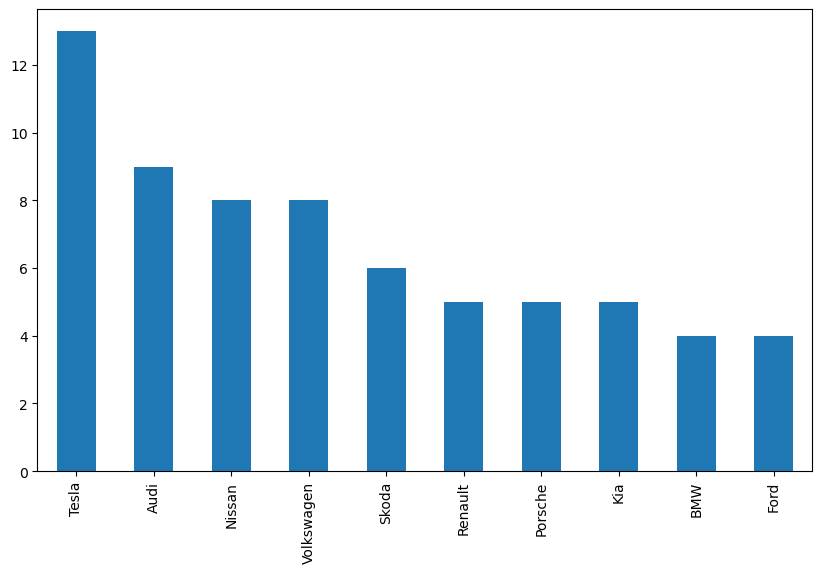

In [22]:
plt.figure(figsize=(10,6))
ev_car_df['Brand'].value_counts().head(10).plot(kind='bar')
plt.show()

#### Observations
 - Number of Models in EV : Tesla followed by Audi


<Axes: xlabel='AccelSec', ylabel='Count'>

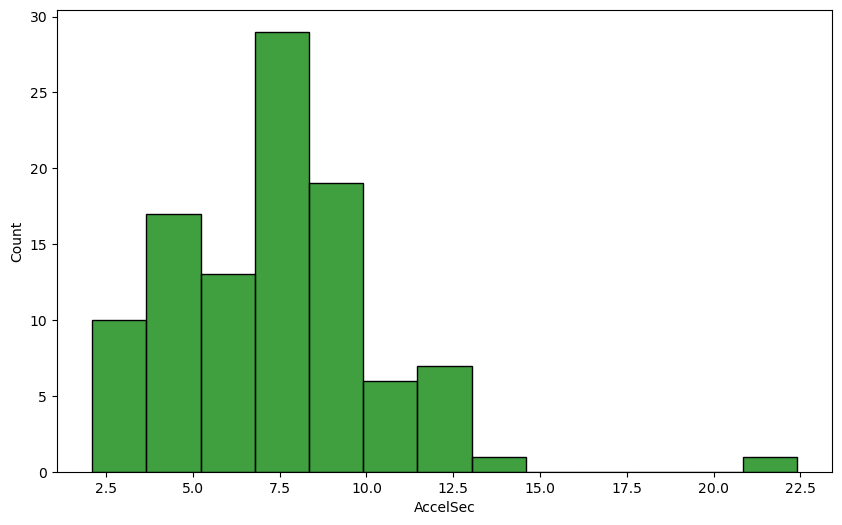

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(x='AccelSec', data=ev_car_df, color='g')

#### Observation
 - These are some higher values of AccelSec which can be
considered as anomolies

<Axes: >

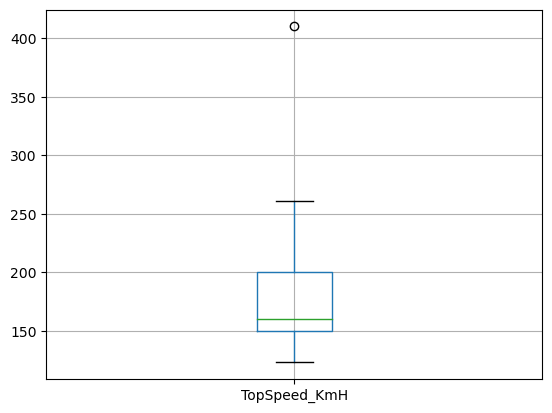

In [24]:
ev_car_df.boxplot(column='TopSpeed_KmH')

#### Observation
 - we definitely see a outlier in TopSpeed_KmH which make
distribution Right Skewed


<Axes: xlabel='Range_Km', ylabel='Count'>

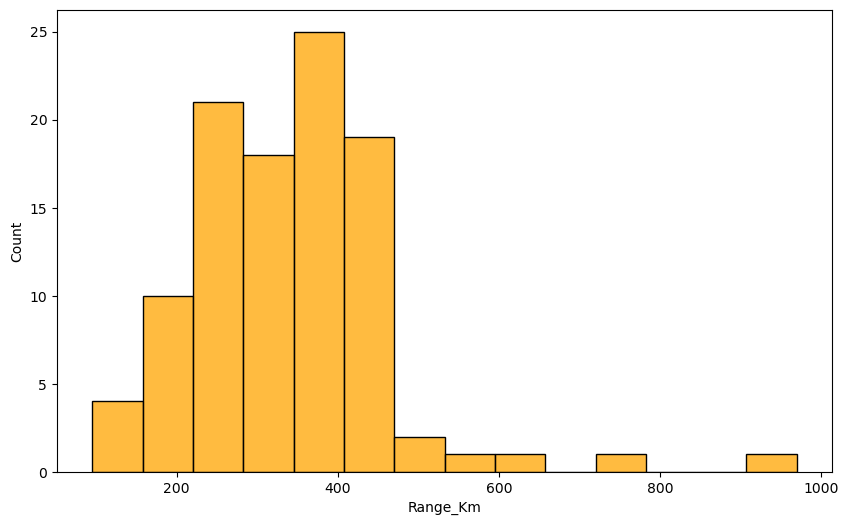

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(x='Range_Km', data=ev_car_df, color='orange')

<Axes: xlabel='Efficiency_WhKm', ylabel='Count'>

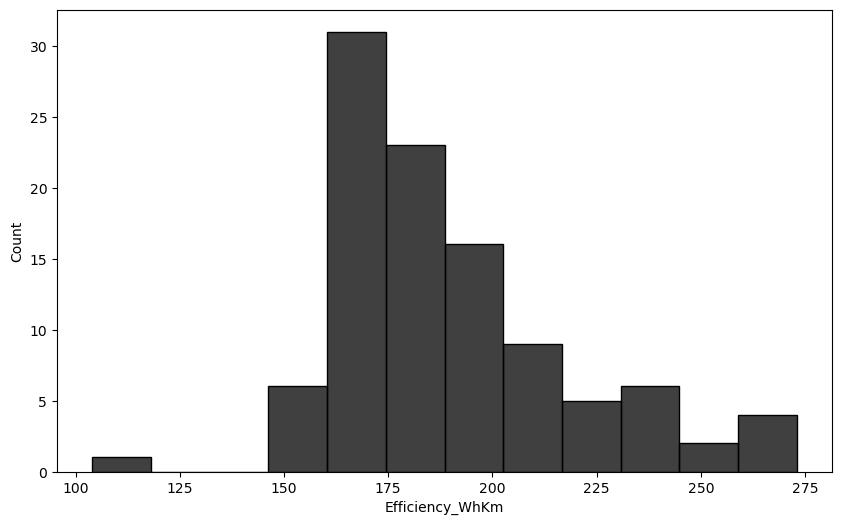

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(x='Efficiency_WhKm', data=ev_car_df, color='black')

<Axes: xlabel='FastCharge_KmH', ylabel='Count'>

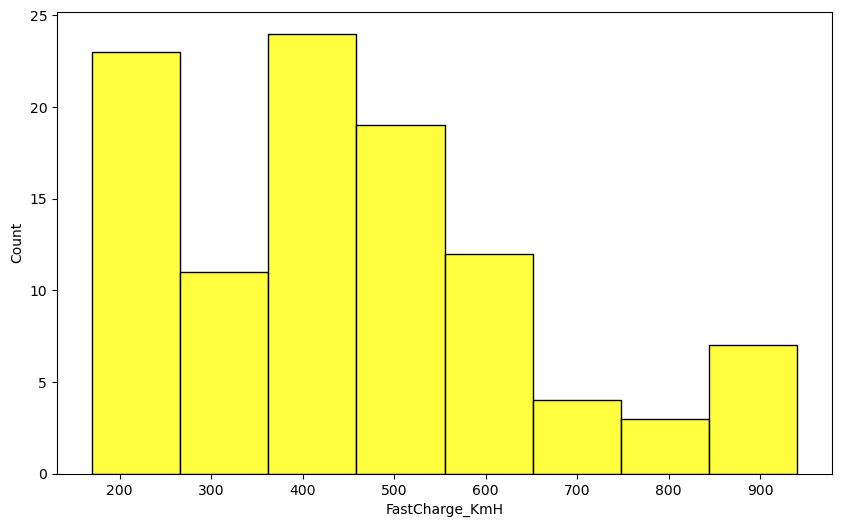

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(x='FastCharge_KmH', data=ev_car_df, color='yellow')

<Axes: ylabel='RapidCharge'>

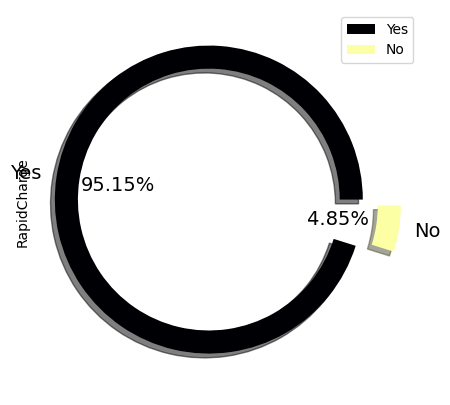

In [28]:
ev_car_df['RapidCharge'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.2f%%', explode=np.ones(2)/8,fontsize=14,legend=True,shadow=True,wedgeprops={'width':0.15}, cmap='inferno')

#### Observation
 - 95% vehicles are RapidCharge Supported


<Axes: ylabel='PlugType'>

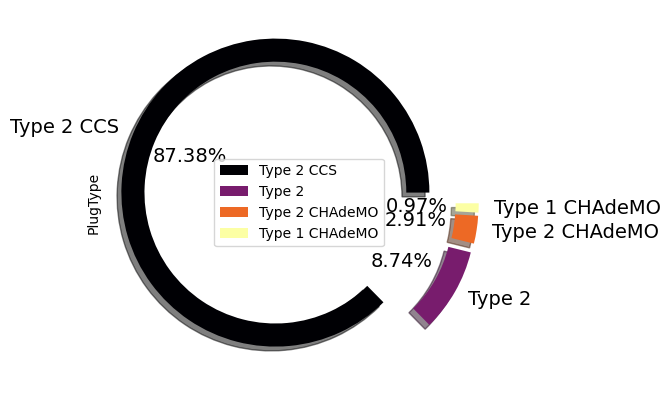

In [29]:
ev_car_df['PlugType'].value_counts().plot(kind='pie',figsize=(5,5),
 autopct='%.2f%%', explode=np.ones(4)/6
 ,fontsize=14,legend=True,shadow=True,
 wedgeprops={'width':0.15}, cmap='inferno')

#### Observation
 - 87% vehicles are of plug Type "Type2CCS"

<Axes: ylabel='PowerTrain'>

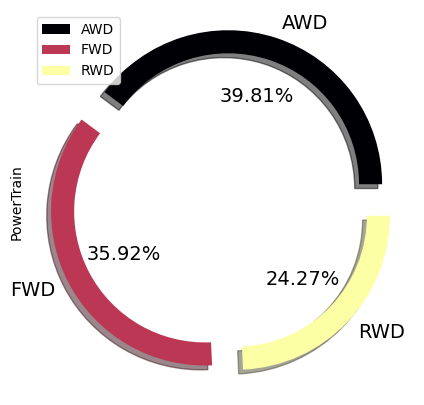

In [30]:
ev_car_df['PowerTrain'].value_counts().plot(kind='pie',figsize=(5,5),
 autopct='%.2f%%', explode=np.ones(3)/8,
 fontsize=14,legend=True,shadow=True,
 wedgeprops={'width':0.15}, cmap='inferno')


<Axes: >

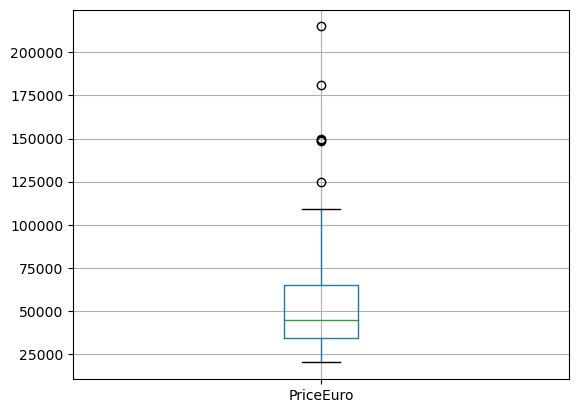

In [31]:
ev_car_df.boxplot(column='PriceEuro')

#### Observation
 - There are definitely vehicles with higher prices 

# 7. Bi-Variate Analysis

In [32]:
# Brand Min, Max and Average price
brand_price = ev_car_df.groupby('Brand').agg({"PriceEuro" : ['min','mean','max']})
brand_price.columns = [ "_".join(col) for col in brand_price.columns]
brand_price.sort_values('PriceEuro_mean',ascending=False).head(10)


,PriceEuro_min,PriceEuro_mean,PriceEuro_max
Brand,,,
Lightyear,149000,149000.000000,149000
Porsche,102945,138265.800000,180781
Lucid,105000,105000.000000,105000
Audi,55000,80593.666667,125000
Tesla,45000,80272.307692,215000
Jaguar,75351,75351.000000,75351
Mercedes,45000,61705.000000,70631
Volvo,60437,60437.000000,60437
Byton,53500,59833.333333,64000


#### Observations
1. Average price of Audi is slighly on higer side when compared
with tesla 
2. Max price for Audi is 125000 Euros while for Tesla it is 215000
Euros

In [33]:
rapidcharge_price = ev_car_df.groupby('RapidCharge').agg({"PriceEuro" :'mean'}).reset_index()
rapidcharge_price.columns = ['RapidCharge', 'PriceEuro']
rapidcharge_price.sort_values('PriceEuro',ascending=False).head(10)

,RapidCharge,PriceEuro
1,Yes,57324.683673
0,No,26154.400000


#### Observations
 - Rapid Charge Vehicle are 50% higher on price when compared with
Non Rapid Charge Vehicles

In [34]:
ev_car_df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [35]:
pt_price = ev_car_df.groupby('PowerTrain').agg({"PriceEuro" :'mean'}).reset_index()
pt_price.columns = ['PowerTrain', 'PriceEuro']
pt_price.sort_values('PriceEuro',ascending=False).head(10)

,PowerTrain,PriceEuro
0,AWD,83840.097561
2,RWD,40061.040000
1,FWD,35395.162162


#### Observations
 - Averge Price for AWD Vehicles are on higher side

In [36]:
seats_price = ev_car_df.groupby('Seats').agg({"PriceEuro" :'mean'}).reset_index()
seats_price.columns = ['Seats', 'PriceEuro']
seats_price.sort_values('PriceEuro',ascending=False).head(10)


,Seats,PriceEuro
1,4,70624.333333
4,7,69516.166667
3,6,58333.333333
2,5,51090.577465
0,2,22976.000000


#### Observation
 - We have 5 seating vehicles are more in percentage because of
its price is low when compared with 4 seating 

# 8. Multi-Variate Analysis

<Axes: >

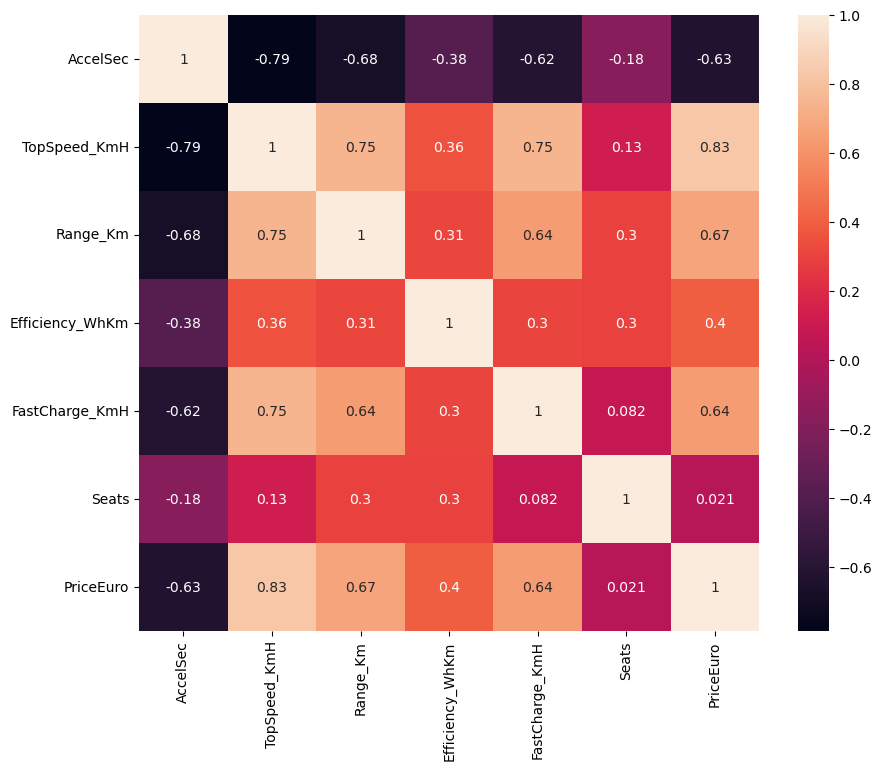

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(ev_car_df.corr(),annot=True)

#### Observation:
 Considering 0.8 correlation value 
 - Strong Negative corelation between TopSpeed_KmH and
AccelSec 

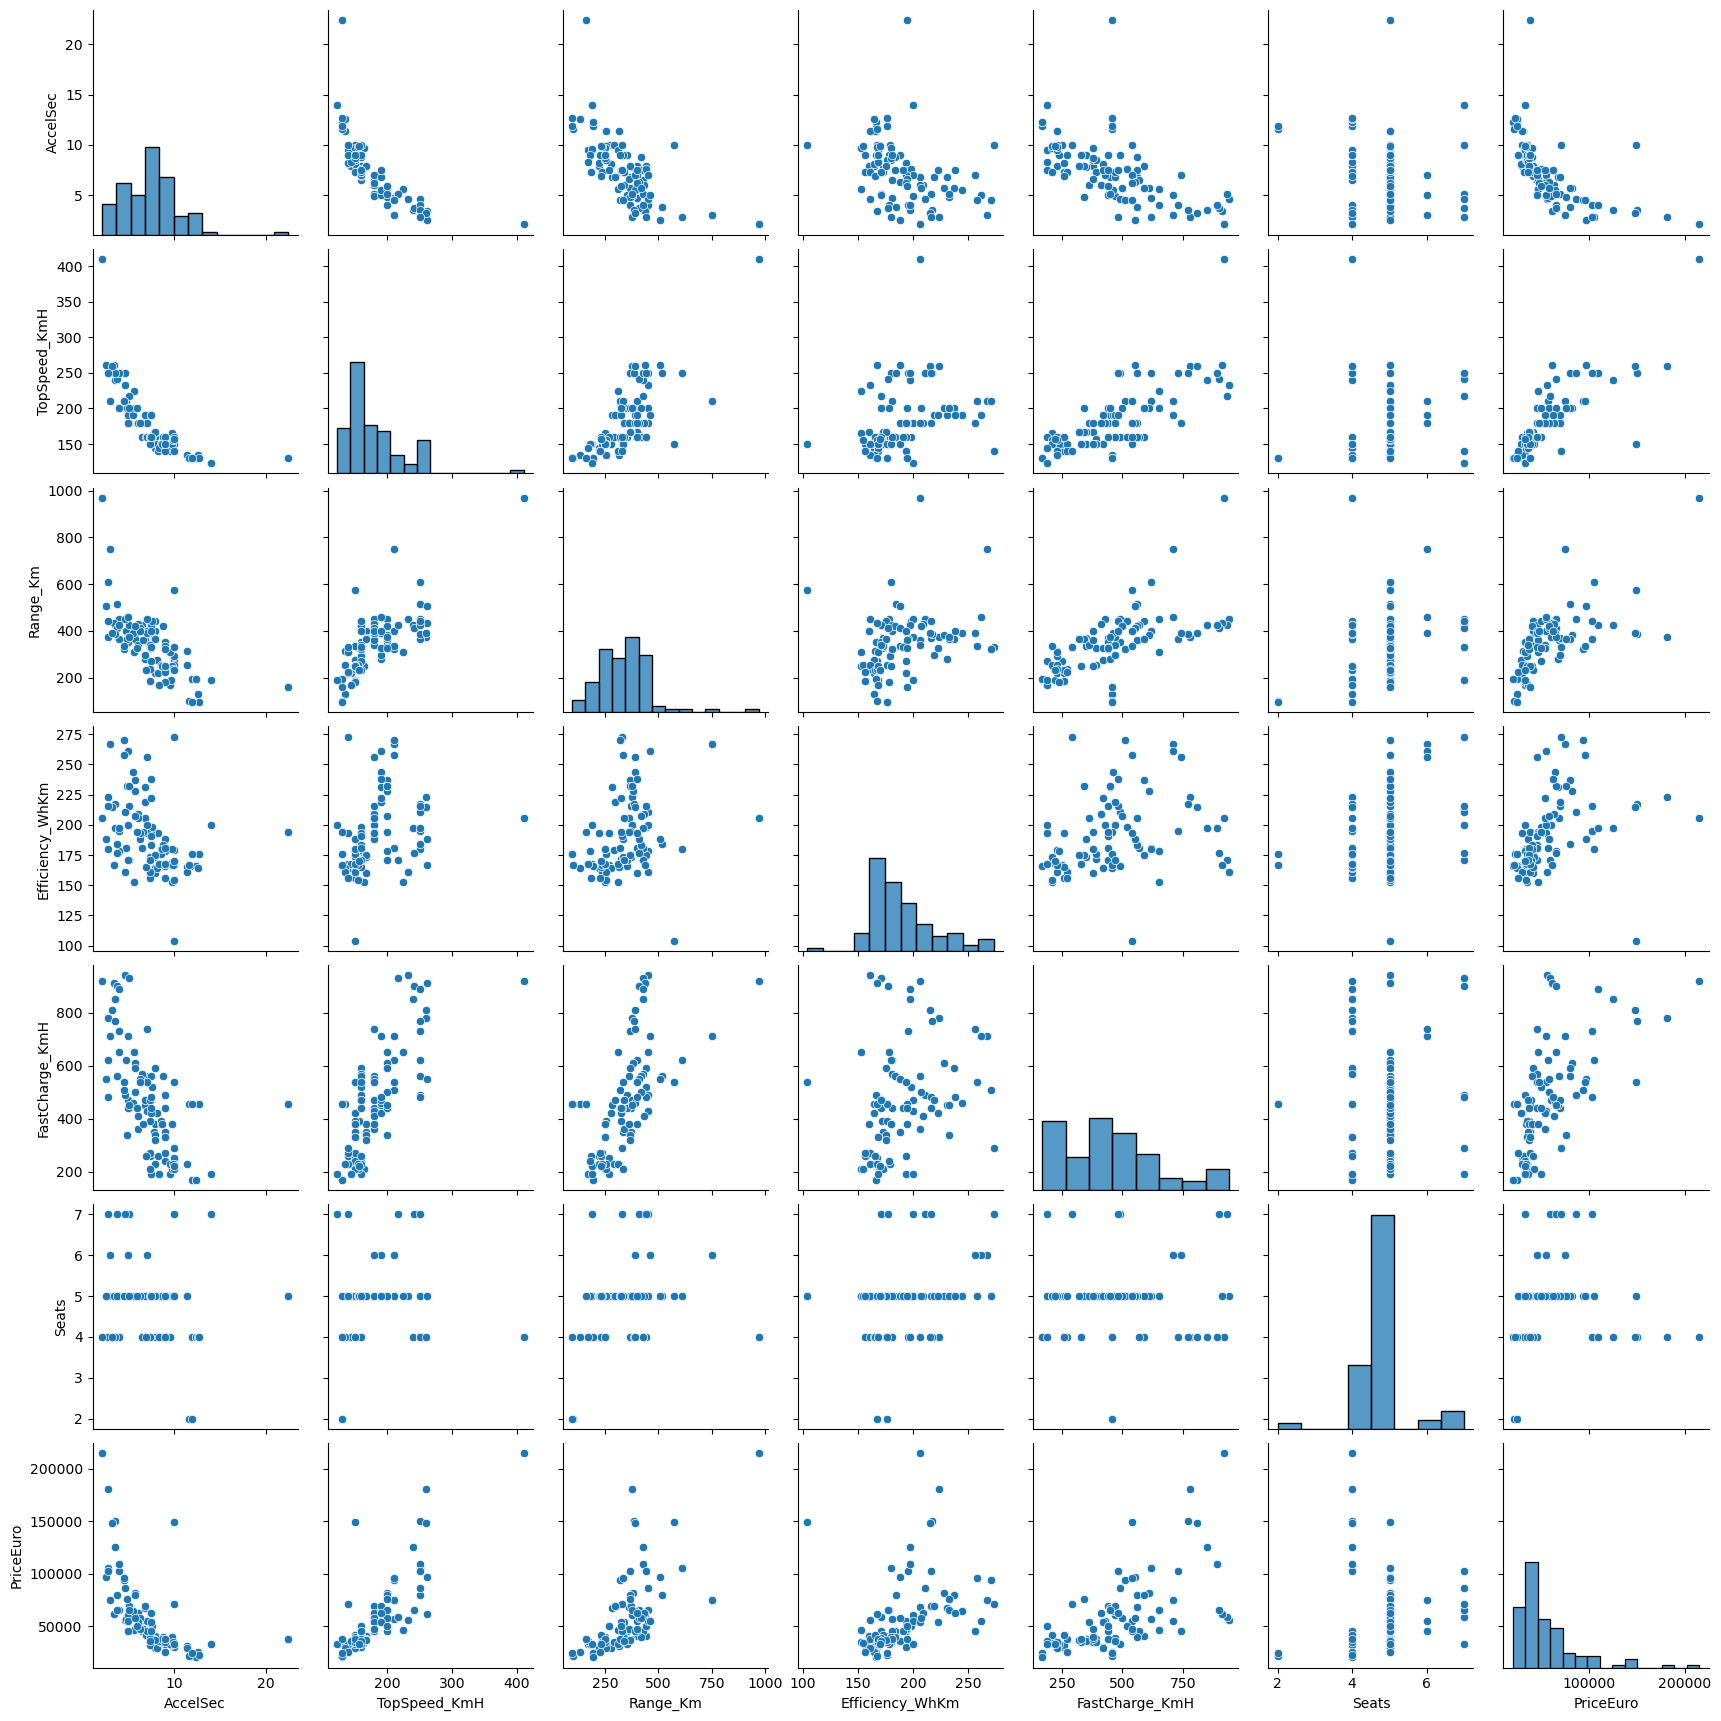

In [38]:
sns.pairplot(ev_car_df)

# 9.Building Regression Model

In [39]:
for col in ev_car_df.columns:
    print(f"{col} = {ev_car_df[col].nunique()}")

Brand = 33
Model = 102
AccelSec = 55
TopSpeed_KmH = 25
Range_Km = 50
Efficiency_WhKm = 54
FastCharge_KmH = 51
RapidCharge = 2
PowerTrain = 3
PlugType = 4
BodyStyle = 9
Segment = 8
Seats = 5
PriceEuro = 87


In [40]:
# Model is so unique - we can consider this as an id column - so dropping this col
ev_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [41]:
ev_car_df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
ev_car_df['Brand']=LE.fit_transform(ev_car_df['Brand'])
ev_car_df['Model']=LE.fit_transform(ev_car_df['Model'])
ev_car_df['RapidCharge']=LE.fit_transform(ev_car_df['RapidCharge'])
ev_car_df['PowerTrain']=LE.fit_transform(ev_car_df['PowerTrain'])
ev_car_df['PlugType']=LE.fit_transform(ev_car_df['PlugType'])
ev_car_df['BodyStyle']=LE.fit_transform(ev_car_df['BodyStyle'])
ev_car_df['Segment']=LE.fit_transform(ev_car_df['Segment'])
ev_car_df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,190,1,2,2,1,1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,7.5,160,330,191,440,1,1,2,1,2,5,45000
99,1,94,4.5,210,335,258,540,1,0,2,6,4,5,96050
100,20,8,5.9,200,325,194,440,1,0,2,1,2,5,50000
101,20,10,5.1,200,375,232,450,1,0,2,1,2,5,65000


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train-Test Split

In [45]:
X = ev_car_df.drop('PriceEuro', axis=1)
y = ev_car_df['PriceEuro']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)                                                  

In [47]:
print("Number of Training Records = ", X_train.shape[0])
print("Number of Test Records = ", X_test.shape[0])


Number of Training Records =  82
Number of Test Records =  21


In [48]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# Linear Regression

In [49]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)

LinearRegression()

In [50]:
y_pred = linear_model.predict(X_test_scaled)

In [51]:
print(linear_model.intercept_)

57217.951219512186


In [52]:
print(linear_model.coef_)

[   754.32552789   4697.32839857  -1677.72584813  11738.25761576
   5057.16896804  -2999.48787607  -2669.21202077    309.69541182
  -4828.59467587    515.77120097    425.92241121  19054.54851832
 -10466.05042102]


## Model Evaluation

In [53]:
rmse_error = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE = ", rmse_error)

RMSE =  10258.783088571921


In [54]:
rscore = r2_score(y_test,y_pred)
print("R2_SCORE =", rscore)

R2_SCORE = 0.8419737382579777


In [55]:
comp_df_lr = pd.concat([pd.DataFrame(pd.Series(y_test)).reset_index(drop=True),
                        pd.DataFrame(pd.Series(y_pred)).reset_index(drop=True)],axis=1)
comp_df_lr.columns = ['ACTUAL','PREDICTED']
comp_df_lr

,ACTUAL,PREDICTED
0,54475,56302.188173
1,125000,122491.405545
2,21421,29179.677787
3,35000,26681.157016
4,62900,67575.981721
5,46900,54539.844783
6,33246,43447.304893
7,41906,24626.825514
8,45000,45528.872545
9,31900,42174.520553


# Random Forest

### Train-Test Split

In [56]:
X = ev_car_df.drop('PriceEuro',axis=1)
y = ev_car_df['PriceEuro']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [58]:
print("Number of Training Records = ", X_train.shape[0])
print("Number of Test Records = ", X_test.shape[0])

Number of Training Records =  82
Number of Test Records =  21


In [59]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
y_rf_pred = rf_model.predict(X_test)

## Model Evaluation

In [61]:
rmse_error = np.sqrt(mean_squared_error(y_test,y_rf_pred))
print("RMSE = ", rmse_error)

RMSE =  25112.04214488387


In [62]:
rscore = r2_score(y_test,y_rf_pred)
print("R2_SCORE =", rscore)

R2_SCORE = 0.5912752075700394


In [63]:
comp_df_rf = pd.concat([pd.DataFrame(pd.Series(y_test)).reset_index(drop=True),
                        pd.DataFrame(pd.Series(y_rf_pred)).reset_index(drop=True)],axis=1)
comp_df_rf.columns = ['ACTUAL','PREDICTED']
comp_df_rf

,ACTUAL,PREDICTED
0,150000,110464.77
1,22030,24443.59
2,38105,36652.10
3,105000,104384.94
4,56440,66648.43
5,41906,35343.03
6,33133,31434.48
7,45000,38835.82
8,24565,26112.53
9,55480,69539.40


In [64]:
rf_model.feature_names_in_

array(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats'], dtype=object)

In [65]:
rf_model.feature_importances_

array([3.90559601e-03, 2.23030460e-02, 4.31846557e-01, 2.44078911e-01,
       3.77531694e-02, 4.09526235e-02, 4.87250606e-02, 1.95425785e-05,
       3.69105201e-02, 3.34126713e-03, 1.20726159e-02, 8.67037972e-02,
       3.13872942e-02])

In [66]:
from decimal import Decimal
for f_name, fval in zip(rf_model.feature_names_in_,rf_model.feature_importances_):
    print("%-30s = %-10f"%(f_name,Decimal(fval)))

Brand                          = 0.003906  
Model                          = 0.022303  
AccelSec                       = 0.431847  
TopSpeed_KmH                   = 0.244079  
Range_Km                       = 0.037753  
Efficiency_WhKm                = 0.040953  
FastCharge_KmH                 = 0.048725  
RapidCharge                    = 0.000020  
PowerTrain                     = 0.036911  
PlugType                       = 0.003341  
BodyStyle                      = 0.012073  
Segment                        = 0.086704  
Seats                          = 0.031387  


## Model Recommendation
The key drivers for predicting PriceEuro area following features
1. AccelSec
2. Segment_F
3. TopSpeed_KmH